In [152]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [153]:
one_matrix = plt.imread("USPS_1_5/usps_1.jpg")
two_matrix = plt.imread("USPS_1_5/usps_2.jpg")
three_matrix = plt.imread("USPS_1_5/usps_3.jpg")
four_matrix = plt.imread("USPS_1_5/usps_4.jpg")
five_matrix = plt.imread("USPS_1_5/usps_5.jpg")

In [154]:
datas_list = []

In [155]:
def split_photos(matrix):
    for i in range(0, 544, 16):
        for j in range(0, 528, 16):
            datas_list.append((matrix[i:(i+16) , j:(j+16)]).flatten())

In [156]:
split_photos(one_matrix)
split_photos(two_matrix)
split_photos(three_matrix)
split_photos(four_matrix)
split_photos(five_matrix)

datas = np.array(datas_list)

In [157]:

def kmeans(X, k, max_iters=10000, tol=1e-4):
    
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return labels, centroids

In [158]:
labels, centers = kmeans(datas, 5, 10000)

In [159]:
centers

array([[ 2.99789695, 10.54679285, 20.21030494, ..., 32.13880126,
        27.73922187, 10.04311251],
       [ 3.60526316,  6.90131579,  8.20065789, ..., 15.5372807 ,
        16.61184211,  6.33442982],
       [ 4.4509562 , 11.97594078, 17.90561382, ...,  7.76310919,
         4.89759408,  2.57310302],
       [ 1.76623377,  2.84515485,  2.3986014 , ...,  2.06893107,
         2.56643357,  1.60539461],
       [ 4.37777778,  8.86488889, 11.68266667, ..., 12.93866667,
        11.90222222,  5.85422222]])

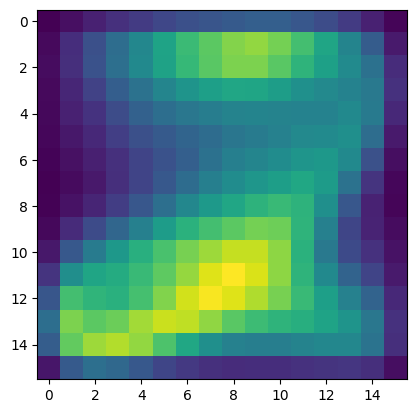

In [160]:
plt.imshow(centers[0].reshape(16, 16))

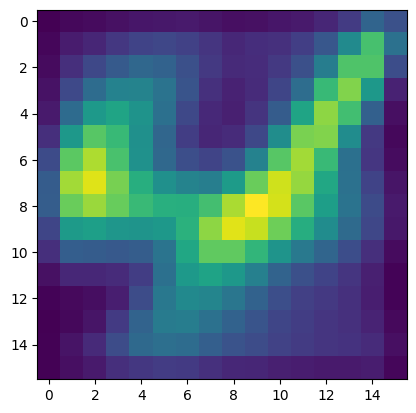

In [161]:
plt.imshow(centers[1].reshape(16, 16))

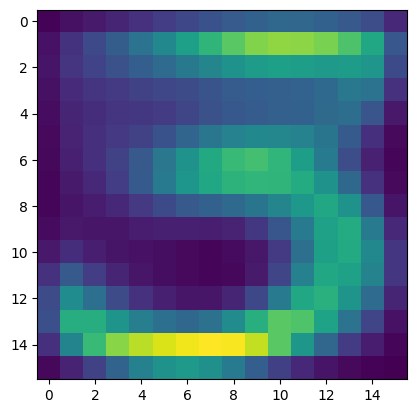

In [162]:
plt.imshow(centers[2].reshape(16, 16))

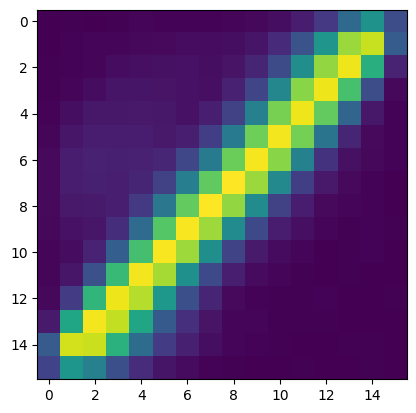

In [163]:
plt.imshow(centers[3].reshape(16, 16))

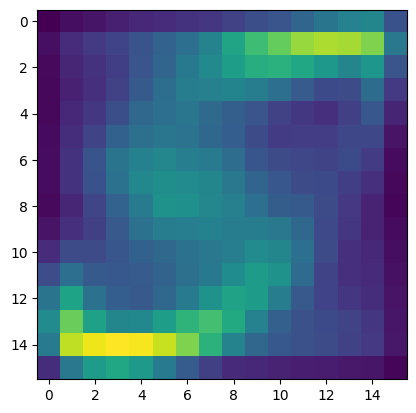

In [164]:
plt.imshow(centers[4].reshape(16, 16))